In [7]:
import numpy as np
import matplotlib.pyplot as plt
import random

In [2]:
np.random.seed(42)
num_samples_per_cluster = 25
mean_cluster1 = [2, 2]
cov_cluster1 = [[1, 0.5], [0.5, 1]] 
cluster1_samples = np.random.multivariate_normal(mean_cluster1, cov_cluster1, num_samples_per_cluster)
mean_cluster2 = [-2, -2]
cov_cluster2 = [[1, -0.5], [-0.5, 1]] 
cluster2_samples = np.random.multivariate_normal(mean_cluster2, cov_cluster2, num_samples_per_cluster)
X = np.vstack([cluster1_samples, cluster2_samples])

np.random.shuffle(X)

print(X, X.shape)

[[ 1.89807704  0.67723339]
 [ 2.41598797  2.52691056]
 [ 3.05181224  3.24867348]
 [ 3.49252377  2.08022007]
 [ 2.74709465  0.8338144 ]
 [-1.63120228 -2.01168515]
 [ 3.77496643  3.2126789 ]
 [-1.55583526 -2.77182689]
 [-2.12592005 -1.61302468]
 [-1.59974913 -1.43160588]
 [ 2.80894067  3.18463869]
 [-2.12172195 -2.11286518]
 [-2.39218185 -3.0713331 ]
 [ 2.58393791  0.82089775]
 [ 1.59495412  3.4472323 ]
 [-1.10793021 -2.2803935 ]
 [-2.47320609 -1.91187619]
 [-1.79910998 -1.22534489]
 [-1.67785243 -2.50780655]
 [-1.54395949 -0.91800394]
 [ 0.84359908  0.61782278]
 [ 0.24864422  1.01607895]
 [ 2.63419637  2.16846662]
 [-3.07325162 -2.91431729]
 [ 1.27478504  1.44615332]
 [-1.43587096 -1.56059615]
 [ 2.79895388  0.83928376]
 [-1.42782249 -2.88138988]
 [ 1.63896508  1.50070077]
 [ 2.13529672  2.67785677]
 [ 3.64035971  2.9205155 ]
 [ 2.2507062   1.9496025 ]
 [-2.42723172 -0.64148816]
 [-2.63574586 -2.00937389]
 [ 0.67971706 -3.85781456]
 [ 2.5405444   1.48283348]
 [ 2.31985125  2.08571429]
 

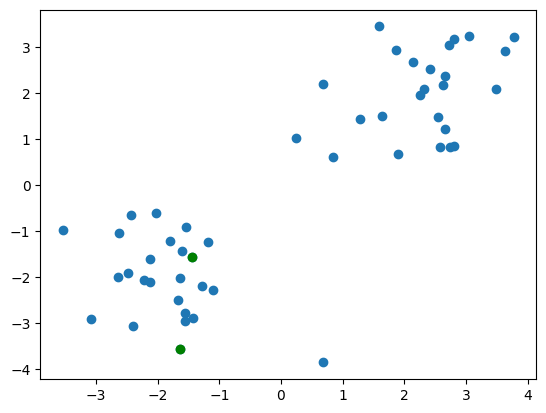

In [137]:
plt.scatter(X[:,0], X[:,1])
plt.show()

In [158]:
def generate_centroids(k):
    centroids = np.zeros((k,2))

    for centroid in range(k):
        rand_index = random.randint(0, X.shape[0] - 1)
        new_centroid = X[rand_index]

        if new_centroid in centroids:
            centroid - 1
            continue
        else: centroids[centroid] = new_centroid

    return centroids


def compute_distance(x, centroid):
    return np.sum(np.abs(x - centroid) ** 2)


def perform_kmeans(X, iterations=100, k=2):
    centroids = generate_centroids(k)
    points = [[], []]

    for i in range(iterations):
        for sample in X:
            distances = [compute_distance(sample, centroid) for centroid in centroids]
            ci = np.argmin(distances)
            chosen_centroid = centroids[ci]
            points[ci].append(sample)

        print(centroids)
        
        for ci in range(k):
            new_centroids = np.zeros((k,2))
            new_centroids[ci] = np.mean(points[ci])
        
        if np.array_equal(new_centroids, centroids): break
        else:
            centroids = new_centroids

    return points

In [161]:
points = perform_kmeans(X, iterations=4000)

[[-2.62838593 -1.04286296]
 [ 3.64035971  2.9205155 ]]
[[0.         0.        ]
 [2.21917649 2.21917649]]
[[0.         0.        ]
 [2.25084597 2.25084597]]
[[0.         0.        ]
 [2.26170408 2.26170408]]
[[0.         0.        ]
 [2.26719151 2.26719151]]
[[0.         0.        ]
 [2.27050289 2.27050289]]
[[0.         0.        ]
 [2.27271842 2.27271842]]
[[0.         0.        ]
 [2.27430484 2.27430484]]
[[0.         0.        ]
 [2.27549681 2.27549681]]
[[0.         0.        ]
 [2.27642517 2.27642517]]
[[0.         0.        ]
 [2.27716866 2.27716866]]
[[0.        0.       ]
 [2.2777775 2.2777775]]
[[0.         0.        ]
 [2.27828523 2.27828523]]
[[0.         0.        ]
 [2.27871511 2.27871511]]
[[0.         0.        ]
 [2.27908377 2.27908377]]
[[0.         0.        ]
 [2.27940342 2.27940342]]
[[0.         0.        ]
 [2.27968322 2.27968322]]
[[0.         0.        ]
 [2.27993019 2.27993019]]
[[0.         0.        ]
 [2.28014978 2.28014978]]
[[0.         0.        ]
 [2.28

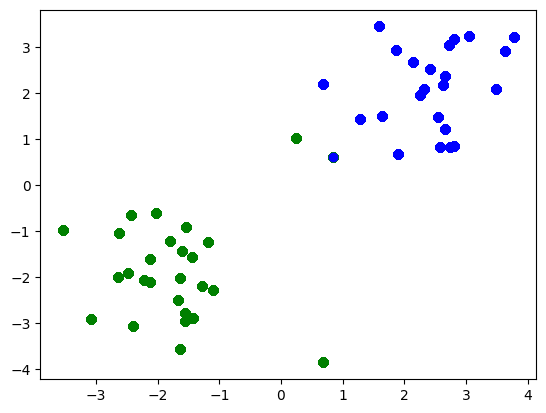

In [162]:
plt.scatter([point[0] for point in points[0]], [point[1] for point in points[0]], c='green')
plt.scatter([point[0] for point in points[1]], [point[1] for point in points[1]], c='blue')
plt.show()